
# Numerical Methods in Finance
@Author: Daniel Rodriguez Delgado 

@Date: 14/01/2019


In [2]:
from math import *
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, pearsonr
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## 1. Método congruencial


In [3]:
# Uniform distribution random generator
def congru(seed, m=((2**31)-1), a=16807, b=0):
        y=(a*seed+b)%m
        u=y/m
        return(u, y)

N=1000
u=[]
seed=123456789
for i in range(N):
    x, seed=congru(seed)
    u.append(x)
    
display(np.mean(u))
display(np.var(u))


0.5030397279733045

0.08224965582494093

## 2. Box-Müller


In [4]:
# Gaussian distribution random generator
def boxmuller(seed, mu=0, sigma=1):
    u1, seed=congru(seed)    #Uniform inputs
    u2, seed=congru(seed)
    
    x=sqrt(-2*log(u1))*cos(2*pi*u2)*sigma+mu  #Gaussian numbers generation
    y=sqrt(-2*log(u1))*sin(2*pi*u2)*sigma+mu
    
    antx=sqrt(-2*log(1-u1))*cos(2*pi*(1-u2))*sigma+mu  #Antithetic numbers generation
    anty=sqrt(-2*log(1-u1))*sin(2*pi*(1-u2))*sigma+mu
    return(x, y, u1, u2, antx, anty, seed)

d=10000
mu=0
sigma=1
coseno=[]
seno=[]
seed=123456789
for i in range(d):
    x, y, u1, u2, antx, anty, seed=boxmuller(seed, mu=mu, sigma=sigma)
    coseno.append(x)
    seno.append(y)
print('The mean and variance obtained by using cos are:')    
display(np.mean(coseno))
display(np.var(coseno))
print('The mean and variance obtained by using sin are:')    
display(np.mean(seno))
display(np.var(seno))    

The mean and variance obtained by using cos are:


-0.008175040731787804

0.9976708276841265

The mean and variance obtained by using sin are:


0.02073007370335584

1.016781499194026

## 3. Método Marsaglia


In [5]:
# Gaussian distribution random generator
def marsaglia(seed, mu=0, sigma=1, mode='normal'):
    
    while True:
        if mode=='normal':
            u1, seed= congru(seed)
            u2, seed= congru(seed)
            v1=2*u1-1
            v2=2*u2-1
            R2=v1**2+v2**2
            if R2<=1:
                y=sqrt(-2*log(R2)/R2)
                x1=v1*y*sigma+mu
                x2=v2*y*sigma+mu
                break
        if mode=='antithetic':
            u1, seed= congru(seed)
            u2, seed= congru(seed)
            v1=2*(1-u1)-1
            v2=2*(1-u2)-1
            R2=v1**2+v2**2
            if R2<=1:
                y=sqrt(-2*log(R2)/R2)
                x1=v1*y*sigma+mu
                x2=v2*y*sigma+mu
                break
        
    return(x1,x2,seed)

d=10000
seed=123456789
mu=0
sigma=1
v1=[]
v2=[]
for i in range(d):
    x1, x2, seed = marsaglia(seed, mu, sigma, 'normal')
    v1.append(x1)
    v2.append(x2)
print("Mean and variance of normal(0,1) set #1")
display(np.mean(v1))    
display(np.var(v1))
print("Mean and variance of normal(0,1) set #2")
display(np.mean(v2))    
display(np.var(v2))

seed=123456789
for i in range(d):
    x1, x2, seed = marsaglia(seed, mu, sigma, 'antithetic')
    v1.append(x1)
    v2.append(x2)

print("Mean and variance of normal(0,1) antithetic set #1")
display(np.mean(v1))    
display(np.var(v1))
print("Mean and variance of normal(0,1) antithetic set #2")
display(np.mean(v2))    
display(np.var(v2))
    

Mean and variance of normal(0,1) set #1


0.009710243297013062

0.9884771984597215

Mean and variance of normal(0,1) set #2


-0.002328196698136957

0.9984206574199248

Mean and variance of normal(0,1) antithetic set #1


0.0

0.9885714872846088

Mean and variance of normal(0,1) antithetic set #2


-7.815970093361103e-18

0.9984260779197902

## 4. Gamma

In [6]:
# Gamma distribution random generator
def gamma (p, a, seed):
    v=[]
    for i in range(p):
        u, seed= congru(seed)
        v.append(log(u))
    x=-sum(v)/a
    return(x, seed)
p=3
a=1/2
N=10000
res=[]
seed=123456789
for i in range(N):
    x, seed=gamma(p, a, seed)
    res.append(x)
    
display(np.mean(res))
display(np.var(res))
    

6.055215535745461

12.266747540012203

## 5. Chi-Square

In [7]:
# Chi^2 distribution random generator
def chisq (n, seed):
    if (n%2==0):
        g, seed=gamma(int(n/2), 1/2, seed)
        return(g, seed)
    else:
        g, seed=gamma(int((n-1)/2), 1/2, seed)
        cos1, sen1, u1, u2, antx, anty, seed = boxmuller(seed)
        x=g+sen1**2
    return(x, seed)

n=8
N=10000
v=[]
for i in range(N):
    x, seed=chisq(n, seed)
    v.append(x)

display(np.mean(v))
display(np.var(v))

7.993775498960968

15.766478585145512

## 6. t-Student


In [8]:
# t-Student distribution random generator
def tstudent (n, seed):
    cos1, sen1, u1, u2, antx, anty, seed=boxmuller(seed)
    xchi, seed=chisq(n, seed)
    x=sen1/sqrt(xchi/n)
    return(x, seed)

n=10
N=10000
v=[]
for i in range(N):
    x, seed=tstudent(n, seed)
    v.append(x)

display(np.mean(v))
display(np.var(v))


-0.015506295476429705

1.2562393199457704

## Random numbers

In [10]:
# Random numbers DataFrame by Box-Muller method
N=100
coseno=[]
seno=[]
U1=[]
U2=[]
ANcos=[]
ANsin=[]
seed=123456789

for i in range(N):
    x, y, u1, u2, antx, anty, seed=boxmuller(seed, mu=mu, sigma=sigma)
    coseno.append(x)
    seno.append(y)
    U1.append(u1)
    U2.append(u2)
    ANcos.append(antx)
    ANsin.append(anty)



,U1,U2,NormCos,NormSen,AntithCos,AntithSin
0,0.218418,0.956318,1.679040,-0.472769,0.675770,0.190277
1,0.829509,0.561695,-0.566060,-0.231124,-1.741431,0.711032
2,0.415307,0.066119,1.212934,0.535037,0.947896,-0.418126
3,0.257578,0.109957,1.269381,1.049543,0.594815,-0.491802
4,0.043829,0.633966,-1.666087,-1.865228,-0.199448,0.223288
5,0.061727,0.449539,-2.242464,0.735809,-0.339180,-0.111293
6,0.401306,0.754673,0.039675,-1.350736,0.029740,1.012485
7,0.797287,0.001838,0.673068,0.007775,1.786478,-0.020636
8,0.897504,0.350752,-0.275127,0.374940,-1.262745,-1.720854
9,0.094545,0.013617,2.164005,0.185600,0.444054,-0.038085


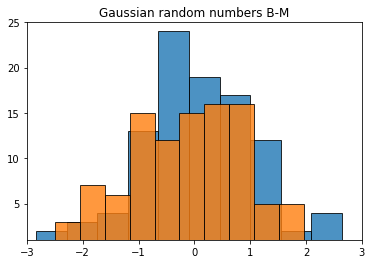

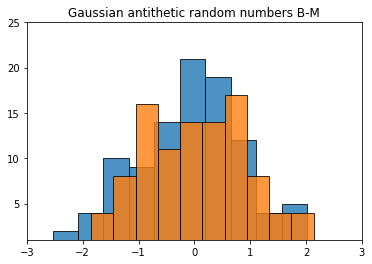

In [11]:
# DataFrame with Random numbers DataFrame by Box-Muller method
randsBM=pd.DataFrame({'U1': U1,           #Uniform set #1
                    'U2': U2,           #Uniform set #2                    
                    'NormCos': coseno,  #Normal set by cos
                    'NormSen': seno,    #Normal set by sin
                    'AntithCos': ANcos, #Antithetic set by cos
                    'AntithSin': ANsin  #Antithetic set by sin
                  })
display(randsBM.head(11))

nbins=10

plt.title('Gaussian random numbers B-M')
plt.axis([-3, 3, 1, 25])
plotcos = plt.hist(coseno, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plotsen = plt.hist(seno, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plt.show()

plt.title('Gaussian antithetic random numbers B-M')
plt.axis([-3, 3, 1, 25])
plotANcos = plt.hist(ANcos, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plotANsen = plt.hist(ANsin, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plt.show()




In [12]:
# Random numbers DataFrame by Marsaglia method
d=100
seed=123456789
mu=0
sigma=1
v1=[]
v2=[]
for i in range(d):
    x1, x2, seed = marsaglia(seed, mu, sigma, 'normal')
    v1.append(x1)
    v2.append(x2)

antv1=[]
antv2=[]
seed=123456789
for i in range(d):
    x1, x2, seed = marsaglia(seed, mu, sigma, 'antithetic')
    antv1.append(x1)
    antv2.append(x2)
    



,Norm1,Norm2,Antith1,Antith2
0,1.242957,0.232724,-1.242957,-0.232724
1,-0.134458,-0.688826,0.134458,0.688826
2,-0.307862,-0.495332,0.307862,0.495332
3,-0.430708,0.126488,0.430708,-0.126488
4,-0.702977,-0.080938,0.702977,0.080938
5,-0.561967,1.450124,0.561967,-1.450124
6,0.757011,-0.284229,-0.757011,0.284229
7,0.143902,0.136589,-0.143902,-0.136589
8,-0.217714,0.374654,0.217714,-0.374654
9,-0.811921,-0.311816,0.811921,0.311816


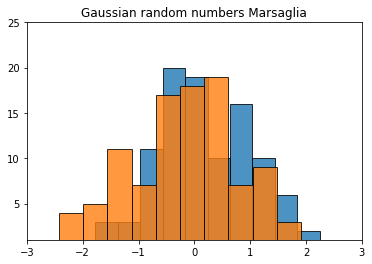

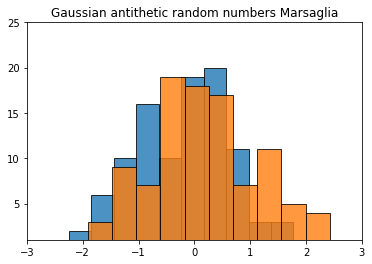

In [17]:
# DataFrame with random numbers DataFrame by Marsaglia method
randsMs=pd.DataFrame({
                      'Norm1': v1,  #Normal set by cos
                      'Norm2': v2,    #Normal set by sin
                      'Antith1': antv1, #Antithetic set by cos
                      'Antith2': antv2  #Antithetic set by sin
                    })
display(randsMs.head(11))

nbins=10
plt.title('Gaussian random numbers Marsaglia')
plt.axis([-3, 3, 1, 25])
plotcos = plt.hist(v1, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plotsen = plt.hist(v2, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plt.show()

plt.title('Gaussian antithetic random numbers Marsaglia')
plt.axis([-3, 3, 1, 25])

plotANcos = plt.hist(antv1, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plotANsen = plt.hist(antv2, nbins, alpha=.8, edgecolor = 'black',  linewidth=1)
plt.show()


## Metrics

Some statistical metrics have been obtained by using numpy functions. They are shown in both DataFrames. First DF shows Gaussian random numbers obtained by Box Muller. The second one, shows Gaussian random numbers obtained by Marsaglia implementation.

In [462]:
# Metrics from Box-Muller Generated numbers
index=['mean', 'variance', 'skewness', 'kurtosis', 'VaR', 'correlation']
metrics=pd.DataFrame({'U1': np.array([np.mean(U1), np.var(U1), skew(U1), kurtosis(U1),np.percentile(U1, 5), np.nan]),
                      'U2': np.array([np.mean(U2), np.var(U2), skew(U2), kurtosis(U2),np.percentile(U2, 5), np.nan]),
                      'NormCos': np.array([np.mean(coseno), np.var(coseno), skew(coseno), kurtosis(coseno), np.percentile(coseno, 5), np.corrcoef(coseno, seno)[0,1]]),
                      'NormSin': np.array([np.mean(seno), np.var(seno), skew(seno), kurtosis(seno),np.percentile(seno, 5), np.nan]),
                      'AntithCos': np.array([np.mean(ANcos), np.var(ANcos), skew(ANcos), kurtosis(ANcos), np.percentile(ANcos, 5), np.corrcoef(ANcos, ANsin)[0,1]]),
                      'AntithSin': np.array([np.mean(ANsin), np.var(ANsin), skew(ANsin), kurtosis(ANsin),np.percentile(ANsin, 5), np.nan])}, index=index)
metrics

,U1,U2,NormCos,NormSin,AntithCos,AntithSin
mean,0.477852,0.514305,0.027371,-0.122018,-0.067730,0.063807
variance,0.083432,0.082089,1.079609,1.040119,0.904502,0.860886
skewness,-0.072074,-0.158643,-0.095561,-0.187513,-0.201527,0.136648
kurtosis,-1.300916,-1.163174,0.260951,-0.589884,-0.225150,-0.734443
VaR,0.043733,0.021170,-1.732634,-1.868009,-1.744378,-1.317551
correlation,NaN,NaN,-0.057932,NaN,0.109998,NaN


In [463]:
# Metrics from Box-Muller Generated numbers
index=['mean', 'variance', 'skewness', 'kurtosis', 'VaR', 'correlation']
metrics=pd.DataFrame({
                      'Norm1': np.array([np.mean(v1), np.var(v1), skew(v1), kurtosis(v1), np.percentile(v1, 5), np.corrcoef(v1, v2)[0,1]]),
                      'Norm2': np.array([np.mean(v2), np.var(v2), skew(v2), kurtosis(v2),np.percentile(v2, 5), np.nan]),
                      'Antith1': np.array([np.mean(antv1), np.var(antv1), skew(antv1), kurtosis(antv1), np.percentile(antv1, 5), np.corrcoef(antv1, antv2)[0,1]]),
                      'Antith2': np.array([np.mean(antv2), np.var(antv2), skew(antv2), kurtosis(antv2),np.percentile(antv2, 5), np.nan])}, index=index)
metrics

,Norm1,Norm2,Antith1,Antith2
mean,0.215905,-0.173280,-0.215905,0.173280
variance,0.707514,0.922911,0.707514,0.922911
skewness,0.128030,-0.222004,-0.128030,0.222004
kurtosis,-0.334521,-0.428084,-0.334521,-0.428084
VaR,-1.012681,-1.904691,-1.732778,-1.281090
correlation,-0.116348,NaN,-0.116348,NaN


## Stochastic process

In this section the Brownian motion is obtained by generating random Gaussian numbers using Box-Muller method. The stochastic equation used is:

\begin{equation}
X\to X\cdot \sqrt{\delta t}\cdot \mathcal{N}(0,1)
\end{equation}

Text(0, 0.5, 'Evolucion')

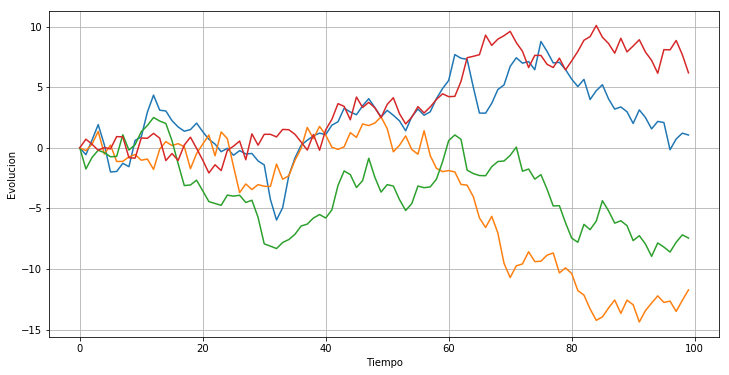

In [489]:
seed=123456789
N = 100            #number of points each partition
T = 100            #number of periods        
Delta = T/N        #period increase  
t = np.arange(1,N) #total period

B1=[0]
B2=[0]
B3=[0]
B4=[0]

for i in t:
    B1=np.append(B1, B1[i-1]+np.sqrt(Delta)*coseno[i])
    B2=np.append(B2, B2[i-1]+np.sqrt(Delta)*seno[i])
    B3=np.append(B3, B3[i-1]+np.sqrt(Delta)*ANcos[i])
    B4=np.append(B4, B4[i-1]+np.sqrt(Delta)*ANsin[i])

    
plt.figure(figsize=(12,6))
ejex=range(100)
plt.plot(ejex,B1,ejex,B2,ejex,B3,ejex,B4)
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Evolucion')
# plt.legend('coseno','seno','cosant','sinant')


The same's been done in here but random Gaussian random numbers've been generated by means of Marsaglia method.

Text(0, 0.5, 'Evolucion')

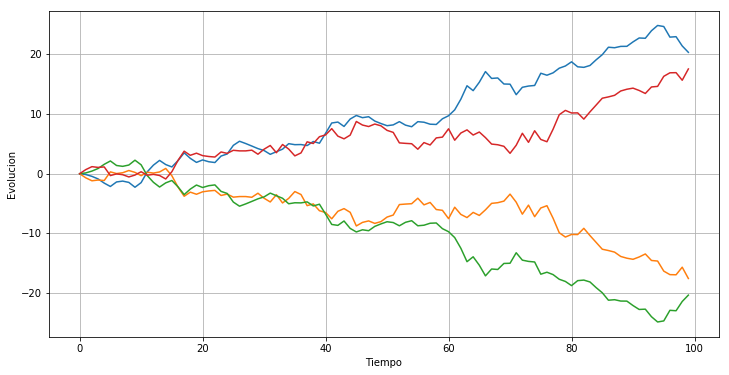

In [493]:
seed=123456789
N = 100            #number of points each partition
T = 100            #number of periods        
Delta = T/N        #period increase  
t = np.arange(1,N) #total period

B1=[0]
B2=[0]
B3=[0]
B4=[0]

for i in t:
    B1=np.append(B1, B1[i-1]+np.sqrt(Delta)*v1[i])
    B2=np.append(B2, B2[i-1]+np.sqrt(Delta)*v2[i])
    B3=np.append(B3, B3[i-1]+np.sqrt(Delta)*antv1[i])
    B4=np.append(B4, B4[i-1]+np.sqrt(Delta)*antv2[i])

    
plt.figure(figsize=(12,6))
ejex=range(100)
plt.plot(ejex,B1,ejex,B2,ejex,B3,ejex,B4)
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Evolucion')
# plt.legend('coseno','seno','cosant','sinant')
